In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

#1) Mutual Information(Karşılıklı bilgi)'u Anlamak
Grafiklere göre, SalePrice ile en yüksek karşılıklı bilgiye sahip olan özellik hangisi olurdu?

In [5]:
# set matplotlib defaults
plt.style.use('seaborn-v0_8')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ames.csv')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,0.0,No_Pool,Good_Privacy,NaN,0.0,3,2006,WD,Normal,142500
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2006,WD,Normal,131000
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,Shed,700.0,7,2006,WD,Normal,132000
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2006,WD,Normal,170000


In [6]:
def make_mi_scores(X, y):
  X = X.copy()
  for colname in X.select_dtypes(['object', 'category']):
    X[colname], _ = X[colname].factorize()

  discreate_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
  mi_scores = mutual_info_regression(X, y, discrete_features=discreate_features)
  mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')


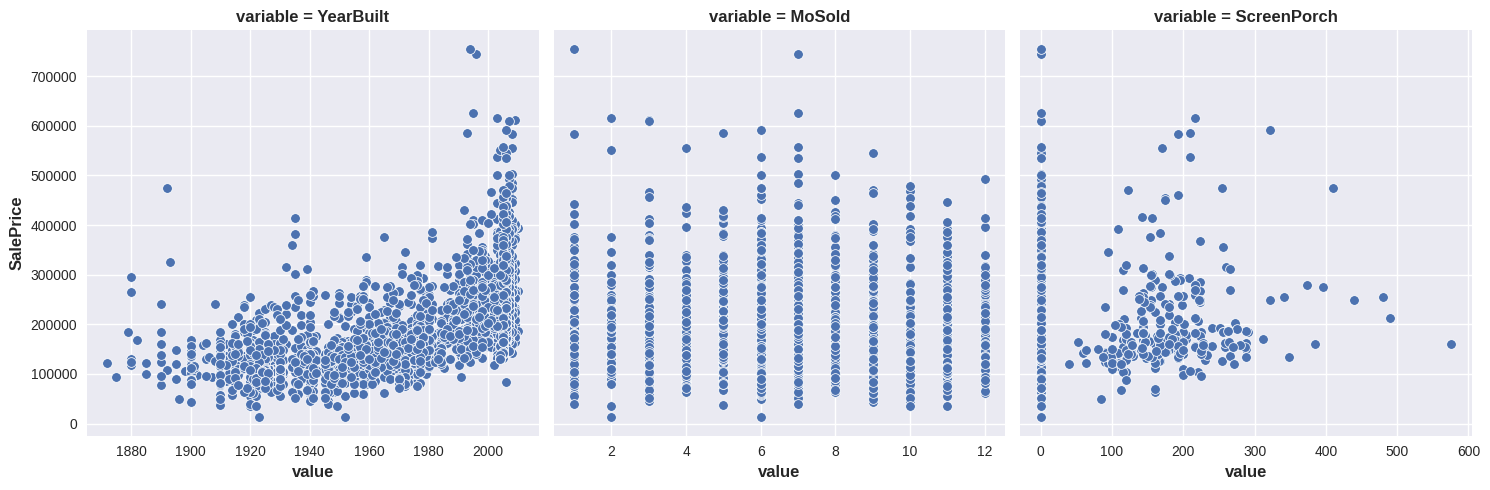

In [7]:
from seaborn._core.typing import default
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(x="value", y= "SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),);

In [8]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

OverallQual     0.591327
Neighborhood    0.577806
GrLivArea       0.494542
YearBuilt       0.437377
GarageArea      0.417490
TotalBsmtSF     0.391342
GarageCars      0.389245
FirstFlrSF      0.370184
BsmtQual        0.367617
KitchenQual     0.324018
YearRemodAdd    0.324010
ExterQual       0.323924
MSSubClass      0.286630
GarageFinish    0.278117
FullBath        0.264687
LotFrontage     0.231845
GarageType      0.229491
Foundation      0.229387
FireplaceQu     0.224479
SecondFlrSF     0.205621
Name: MI Scores, dtype: float64


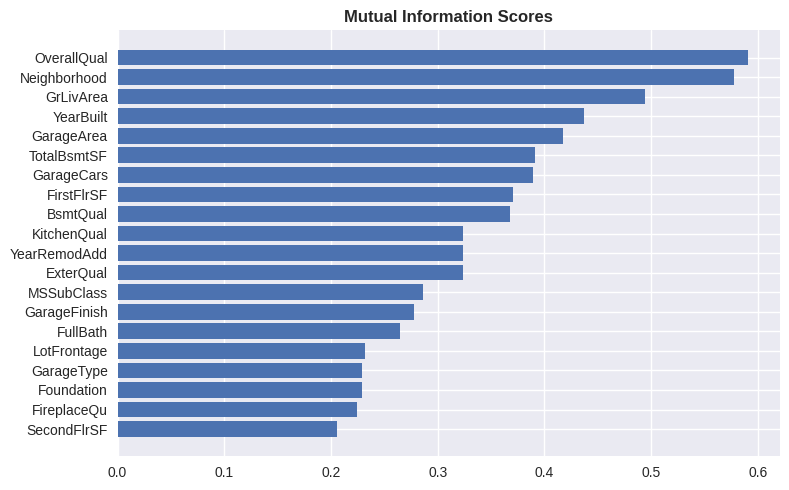

In [9]:
print(mi_scores.head(20))
#print(mi_scores.tail(20)) # son 20 satır

plt.figure(dpi=100, figsize=(8, 5)),
plot_mi_scores(mi_scores.head(20))

#2-) MI Puanlarını İnceleme
Puanlar makul görünüyor mu? Yüksek puan alan özellikler, çoğu insanın bir evde değer vereceğini düşündüğünüz şeyleri temsil ediyor mu? Tanımladıkları şeylerde herhangi bir tema fark ediyor musunuz?

In this step you'll investigate possible interaction effects for the BldgType feature. This feature describes the broad structure of the dwelling in five categories:
>Bldg Type (Nominal): Konut tipi
>>1Fam	Single-family Detached

>>2FmCon    İki ailelik dönüşüm; orijinal olarak tek ailelik konut olarak inşa edilmiştir.

>> Duplx	Duplex

>>TwnhsE    Şehir Evi Son Ünite

>>TwnhsI    Şehir İçi Konut

`BldgType` özelliği çok yüksek bir MI puanı almadı. Bir grafik, `BldgType`'daki kategorilerin `SalePrice`'daki değerleri ayırt etmede pek başarılı olmadığını doğruluyor (diğer bir deyişle, dağılımlar oldukça benzer görünüyor):

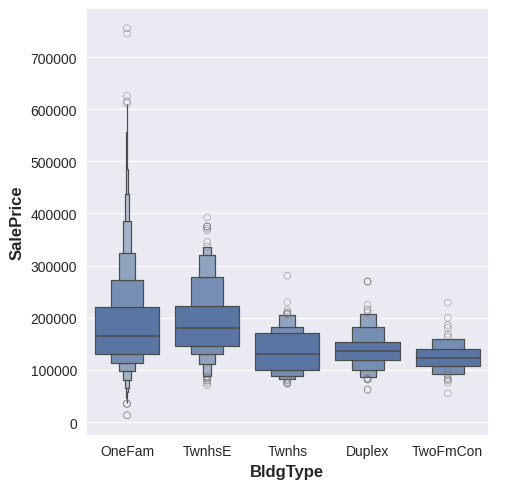

In [12]:
sns.catplot(x='BldgType', y='SalePrice', data=df, kind='boxen')

Yine de bir konutun tipi önemli bir bilgi gibi görünüyor. `BldgType`'ın aşağıdakilerden herhangi biriyle anlamlı bir etkileşim üretip üretmediğini araştırın:

```
GrLivArea  # Above ground living area
MoSold     # Month sold
```

Aşağıdaki hücreyi 2 kez çalıştırın; ilkinde `feature= "GrLivArea"`, ikincisinde ise `feature="MoSold"` olarak ayarlayın:

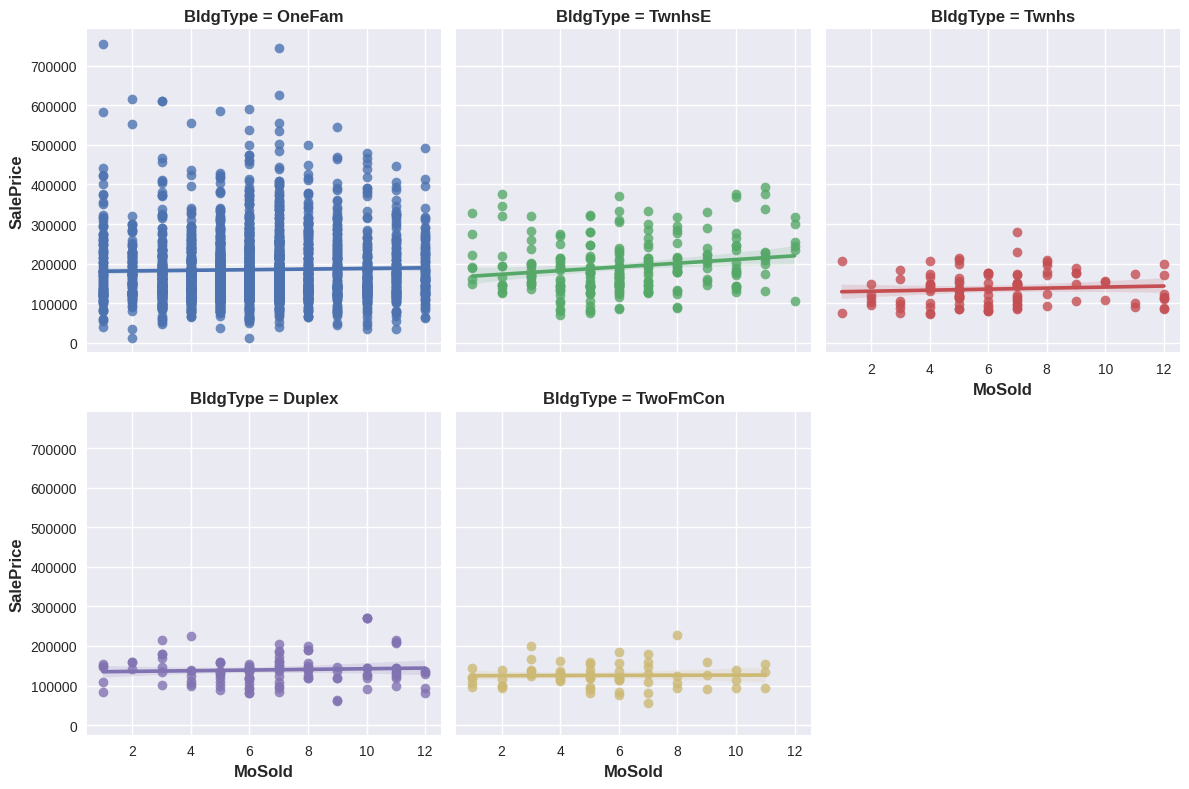

In [16]:
feature = "MoSold"
#feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

Eğilim çizgilerinin bir kategoriden diğerine önemli ölçüde farklılık göstermesi bir etkileşim etkisine işaret eder.

#3-) Etkileşimi keşfedin

Grafiklerden `BldgType`'ın `GrLivArea` veya `MoSold` ile bir etkileşim efekti gösterdiği söylenebilir mi?

##Geliştirme Özelliklerinin İlk Kümesi

>3. derste, yüksek potansiyel taşıdığını belirlediğiniz orijinal özelliklerin kombinasyonları aracılığıyla daha bilgilendirici bir özellik kümesi oluşturmaya başlayacaksınız. Bu nedenle, odaklanabileceğimiz özelliklerin bir listesini yapmak için biraz zaman ayıralım.

En yüksek MI puanına sahip on özellik şunlardı:

In [17]:
mi_scores.head(10)

,MI Scores
OverallQual,0.591327
Neighborhood,0.577806
GrLivArea,0.494542
YearBuilt,0.437377
GarageArea,0.417490
TotalBsmtSF,0.391342
GarageCars,0.389245
FirstFlrSF,0.370184
BsmtQual,0.367617
KitchenQual,0.324018


Buradaki temaları tanıyor musunuz? Konum, boyut ve kalite. Geliştirme faaliyetlerini yalnızca bu en üst özelliklerle sınırlamanıza gerek yok, ancak artık başlamak için iyi bir noktanız var. Bu en üst özellikleri, özellikle etkileşim yarattığını belirlediğiniz diğer ilgili özelliklerle birleştirmek iyi bir stratejidir.